In [40]:
options(repr.plot.width=5, repr.plot.height=4)
library(ggplot2)
#suppressWarnings(warning("Removed"))

In [41]:
load("../../../data/psub.RData")

In [42]:
dtrain <- subset(psub, ORIGRANDGROUP >= 500)

In [43]:
dtest <- subset(psub, ORIGRANDGROUP < 500)

In [44]:
model <- lm(log(PINCP, base=10) ~ AGEP + SEX +COW + SCHL, data = dtrain)

In [45]:
dtest$predLogPINCP <- predict(model,newdata=dtest)
dtrain$predLogPINCP <- predict(model,newdata=dtrain)

`geom_smooth()` using method = 'loess'
Warning message:
“Removed 9 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 9 rows containing missing values (geom_point).”Warning message:
“Removed 67 rows containing missing values (geom_path).”

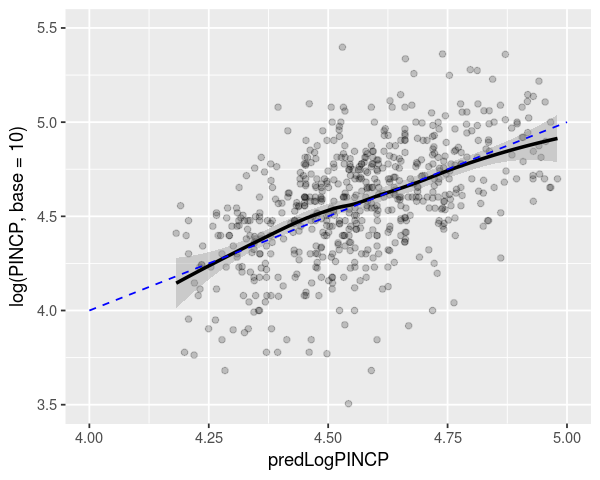

In [46]:
ggplot(data=dtest,aes(x=predLogPINCP,y=log(PINCP,base=10))) +
   geom_point(alpha=0.2,color="black") +
   geom_smooth(aes(x=predLogPINCP,
      y=log(PINCP,base=10)),color="black") +
   geom_line(aes(x=log(PINCP,base=10),
      y=log(PINCP,base=10)),color="blue",linetype=2) +
   scale_x_continuous(limits=c(4,5)) +
   scale_y_continuous(limits=c(3.5,5.5))

`geom_smooth()` using method = 'loess'


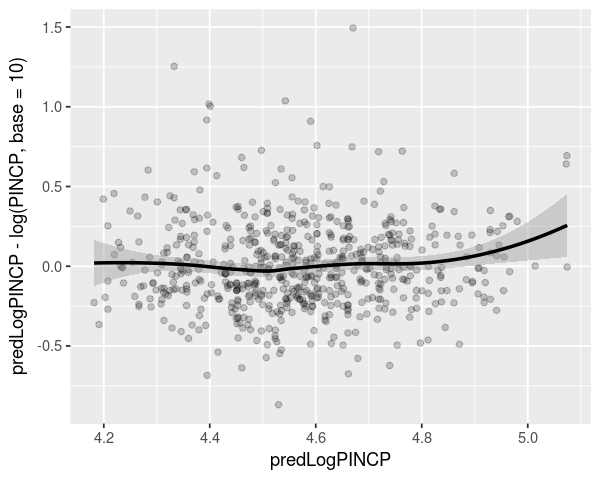

In [47]:
ggplot(data=dtest,aes(x=predLogPINCP,
                     y=predLogPINCP-log(PINCP,base=10))) +
  geom_point(alpha=0.2,color="black") +
  geom_smooth(aes(x=predLogPINCP,
                  y=predLogPINCP-log(PINCP,base=10)),
                  color="black")

In [48]:
rsq <- function(y,f) { 1 - sum((y-f)^2)/sum((y-mean(y))^2) }
rsq(log(dtrain$PINCP,base=10),predict(model,newdata=dtrain))
rsq(log(dtest$PINCP,base=10),predict(model,newdata=dtest))

[1] 0.3382568

[1] 0.2605496

In [49]:
rmse <- function(y, f) { sqrt(mean( (y-f)^2 )) }
rmse(log(dtrain$PINCP,base=10),predict(model,newdata=dtrain))
rmse(log(dtest$PINCP,base=10),predict(model,newdata=dtest))

[1] 0.2651856

[1] 0.2752171

In [50]:
summary(model)$coefficients

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),3.97328317,0.059343473,66.9540047,1.674439e-274
AGEP,0.01171695,0.001352091,8.6658028,4.504461e-17
SEXF,-0.09313262,0.023405113,-3.9791569,7.795632e-05
COWFederal government employee,0.05972743,0.060927033,0.9803109,3.273428e-01
COWLocal government employee,-0.03441690,0.048029911,-0.7165722,4.739275e-01
COWPrivate not-for-profit employee,-0.13352439,0.039222950,-3.4042413,7.094573e-04
COWSelf-employed incorporated,-0.07242727,0.068092611,-1.0636583,2.879277e-01
COWSelf-employed not incorporated,-0.06060878,0.069244144,-0.8752910,3.817792e-01
COWState government employee,-0.08128385,0.057796061,-1.4063908,1.601455e-01
SCHLAssociate's degree,0.22143196,0.052093972,4.2506254,2.485204e-05


In [51]:
summary(model)


Call:
lm(formula = log(PINCP, base = 10) ~ AGEP + SEX + COW + SCHL, 
    data = dtrain)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.29220 -0.14153  0.02458  0.17632  0.62532 

Coefficients:
                                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)                         3.973283   0.059343  66.954  < 2e-16 ***
AGEP                                0.011717   0.001352   8.666  < 2e-16 ***
SEXF                               -0.093133   0.023405  -3.979 7.80e-05 ***
COWFederal government employee      0.059727   0.060927   0.980 0.327343    
COWLocal government employee       -0.034417   0.048030  -0.717 0.473928    
COWPrivate not-for-profit employee -0.133524   0.039223  -3.404 0.000709 ***
COWSelf-employed incorporated      -0.072427   0.068093  -1.064 0.287928    
COWSelf-employed not incorporated  -0.060609   0.069244  -0.875 0.381779    
COWState government employee       -0.081284   0.057796  -1.406 0.160146    
SCHLAssociate's degree

In [52]:
summary(log(dtrain$PINCP,base=10) - predict(model,newdata=dtrain))

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-1.29220 -0.14153  0.02458  0.00000  0.17632  0.62532 

In [53]:
summary(log(dtest$PINCP,base=10) - predict(model,newdata=dtest))

     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
-1.494246 -0.165262  0.018922 -0.004636  0.175471  0.868075 

In [54]:
df <- dim(dtrain)[1] - dim(summary(model)$coefficients)[1]

In [55]:
df

[1] 578

In [56]:
modelResidualError <- sqrt(sum(residuals(model)^2)/df)
modelResidualError

[1] 0.2690571

### Linear regression takeaways

#### Here’s what you should remember about linear regression:

- Linear regression is the go-to statistical modeling method for quantities.
- You should always try linear regression first, and only use more complicated methods if they actually outperform a linear regression model.
- Linear regression will have trouble with problems that have a very large number of variables, or categorical variables with a very large number of levels.
- You can enhance linear regression by adding new variables or transforming variables (like we did with the log() transform of y, but always be wary when transforming y as it changes the error model).
- With linear regression, you think in terms of residuals. You look for variables that correlate with your errors and add them to try and eliminate systematic modeling errors.
- Linear regression can predict well even in the presence of correlated variables, but correlated variables lower the quality of the advice.
- Overly large coefficient magnitudes, overly large standard errors on the coefficient estimates, and the wrong sign on a coefficient could be indications of correlated inputs.
- Linear regression packages have some of the best built-in diagnostics available, but rechecking your model on test data is still your most effective safety check.